<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/da14_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab에서 한글 폰트 사용하기

## Step 1. Colab 가상머신에 한글 폰트 설치

In [265]:
# Colab Jupyter Notebook에서 리눅스 명령어를 실행
!sudo apt-get install -y fonts-nanum    # sudo : 관리자 권한을 가져옴. -y : 전부다 허용 font-nanum : 나눔 폰트 설치
!sudo fc-cache -fv  # fc-cache : 캐쉬 데이터 관련 작업 진행
!rm ~/.cache/matplotlib -rf # rm : 삭제 -rf: 하위 폴더 전부

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## Step 2. Colab Runtime 재시작(Ctrl + M)

## Step 3. `matplotlib.pyplot` 모듈에서 한글 폰트를 사용할 수 있도록 설정.

In [266]:
import matplotlib.pyplot as plt

# matplotlib.pyplot 모듈에서 사용할 폰트 패밀리 한글로 설정
plt.rc('font', family='NanumBarunGothic')

한글 폰트 테스트

In [267]:
import numpy as np
import pandas as pd
import seaborn as sns

In [268]:
df = pd.DataFrame(data={
    '구':['서초구', '강남구', '송파구'],
    '가격':[9_000, 10_000, 8_500]
})

In [269]:
df

,구,가격
0,서초구,9000
1,강남구,10000
2,송파구,8500


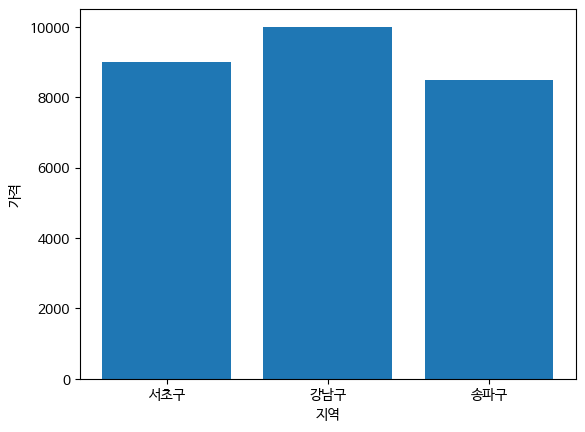

In [270]:
plt.bar(x=df['구'], height=df['가격'])
plt.xlabel('지역')
plt.ylabel('가격')
plt.show()

# 아파트 실거래가 데이터 분석


*   [apt_202504.csv](https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/apt_202504.csv) 파일을 읽고 DataFrame 생성
    *   첫 15줄은 파일 설명 문서 -> skip
    *   encoding 파라미터 설정(한글 인코딩: euc-kr)
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, province 파생 변수(광역시도)를 만듦.
    *   '인천광역시 부평구 부평동' -> '인천광역시'
    *   '충청남도 천안시 서북구' -> '충청남도'
*   '시군구' 컬럼의 값을 이용해서, county 파생 변수(시/군/구)를 만듦.
    *   '인천광역시 부평구 부평동' -> '부평구'
    *   '충청남도 천안시 서북구' -> '천안시'
*   '계약년월' 컬럼의 값을 이용해서, year(계약년도), month(계약월) 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 구별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 구별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

## 데이터프레임 생성

In [271]:
# path
apt_path = "https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/apt_202504.csv"

In [272]:
# make df
apt = pd.read_csv(apt_path,
                  encoding='euc-kr',        # encoding : 파일 인코딩 타입 설정
                  skiprows=15,              # skiprows : 파일에서 몇 줄을 생략할 지 설정.
                  thousands=',',            # thousands : 숫자에서 천자리 구분자로 사용된 문자.
                  na_values='-')            # na_values : NA(null)로 취급할 문자열. 기본값 이외에 취급할 문자. '-'만 있으면 nan으로 값 변

In [273]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaN,중개거래,인천 부평구,NaN
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaN,중개거래,인천 미추홀구,NaN
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaN,중개거래,인천 미추홀구,NaN
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaN,직거래,NaN,25.04.30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaN,중개거래,서울 동대문구,NaN


In [274]:
apt.tail()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
36969,36970,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9921,202504,1,69000,NaN,27,개인,개인,2020,해양5로 17,NaN,중개거래,"경기 시흥시, 경기 안산시 상록구",NaN
36970,36971,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9712,202504,1,68000,NaN,5,개인,개인,2020,해양5로 17,NaN,중개거래,"경기 안산시 상록구, 서울 구로구",NaN
36971,36972,경기도 안산시 상록구 사동,1506,1506,0,본오,38.1300,202504,1,12400,NaN,4,개인,개인,1992,선진로 108,NaN,중개거래,경기 안산시 상록구,NaN
36972,36973,경기도 성남시 분당구 야탑동,156,156,0,목련마을(영남),84.9300,202504,1,86500,NaN,12,개인,개인,1995,판교로 669,NaN,중개거래,경기 성남시 분당구,NaN
36973,36974,울산광역시 동구 전하동,682-1,682,1,삼전아이필하모니,84.5300,202504,1,21500,NaN,15,개인,개인,2006,방어진순환도로 733,NaN,중개거래,울산 동구,NaN


In [275]:
apt.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,해제사유발생일
count,36974.000000,36974.000000,36974.000000,36974.000000,36974.0,36974.000000,3.697400e+04,36974.000000,36974.000000,1.191000e+03
mean,18487.500000,820.122951,3.142587,73.912814,202504.0,14.394088,4.348493e+04,10.057040,2006.137664,2.025043e+07
std,10673.618763,710.453648,38.857493,22.468251,0.0,8.364038,4.163910e+04,6.925089,10.891869,3.079995e+01
min,1.000000,0.000000,0.000000,12.210000,202504.0,1.000000,1.200000e+03,-2.000000,1962.000000,2.025040e+07
25%,9244.250000,366.000000,0.000000,59.840000,202504.0,7.000000,1.820000e+04,5.000000,1997.000000,2.025041e+07
50%,18487.500000,703.000000,0.000000,75.532800,202504.0,14.000000,3.370000e+04,9.000000,2006.000000,2.025042e+07
75%,27730.750000,1080.000000,1.000000,84.950000,202504.0,21.000000,5.550000e+04,14.000000,2017.000000,2.025043e+07
max,36974.000000,7346.000000,5001.000000,244.470000,202504.0,30.000000,1.050000e+06,79.000000,2025.000000,2.025051e+07


In [276]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        36974 non-null  int64  
 1   시군구       36974 non-null  object 
 2   번지        36973 non-null  object 
 3   본번        36974 non-null  int64  
 4   부번        36974 non-null  int64  
 5   단지명       36974 non-null  object 
 6   전용면적(㎡)   36974 non-null  float64
 7   계약년월      36974 non-null  int64  
 8   계약일       36974 non-null  int64  
 9   거래금액(만원)  36974 non-null  int64  
 10  동         5074 non-null   object 
 11  층         36974 non-null  int64  
 12  매수자       36974 non-null  object 
 13  매도자       36974 non-null  object 
 14  건축년도      36974 non-null  int64  
 15  도로명       36974 non-null  object 
 16  해제사유발생일   1191 non-null   float64
 17  거래유형      36974 non-null  object 
 18  중개사소재지    33763 non-null  object 
 19  등기일자      5659 non-null   object 
dtypes: float64(2), int64(8), obj

In [277]:
# 가격 컬럼 숫자 타입 변환
# apt['거래금액(만원)']=apt['거래금액(만원)'].str.split(',').str.join('').astype(int)

In [278]:
apt['거래금액(만원)'].info()        # int

<class 'pandas.core.series.Series'>
RangeIndex: 36974 entries, 0 to 36973
Series name: 거래금액(만원)
Non-Null Count  Dtype
--------------  -----
36974 non-null  int64
dtypes: int64(1)
memory usage: 289.0 KB


In [279]:
apt['해제사유발생일'].unique()

array([      nan, 20250430., 20250507., 20250501., 20250506., 20250502.,
       20250504., 20250429., 20250508., 20250505., 20250428., 20250425.,
       20250426., 20250424., 20250503., 20250422., 20250423., 20250421.,
       20250420., 20250427., 20250419., 20250418., 20250417., 20250416.,
       20250415., 20250414., 20250413., 20250412., 20250411., 20250410.,
       20250409., 20250408., 20250407., 20250406., 20250405., 20250404.,
       20250403., 20250402., 20250401.])

In [280]:
apt['등기일자'].unique()

array([nan, '25.04.30', '25.05.01', '25.05.02', '25.04.29', '25.04.28',
       '25.04.25', '25.04.24', '25.04.23', '25.04.22', '25.04.21',
       '25.04.18', '25.04.17', '25.04.16', '25.04.15', '25.04.14',
       '25.04.11', '25.04.10', '25.04.09', '25.04.08', '25.04.07',
       '25.04.04', '25.04.03', '25.04.02', '25.04.01'], dtype=object)

In [281]:
# 해제사유발생일 컬럼의 값들을 날짜 타입으로 변환.
apt['해제사유발생일'] = pd.to_datetime(apt['해제사유발생일'], format='%Y%m%d')

In [282]:
apt['해제사유발생일'].unique()  # datetime을 저장하고 있는 배열

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-07 00:00:00',
 '2025-05-01 00:00:00', '2025-05-06 00:00:00', '2025-05-02 00:00:00',
 '2025-05-04 00:00:00', '2025-04-29 00:00:00', '2025-05-08 00:00:00',
 '2025-05-05 00:00:00', '2025-04-28 00:00:00', '2025-04-25 00:00:00',
 '2025-04-26 00:00:00', '2025-04-24 00:00:00', '2025-05-03 00:00:00',
 '2025-04-22 00:00:00', '2025-04-23 00:00:00', '2025-04-21 00:00:00',
 '2025-04-20 00:00:00', '2025-04-27 00:00:00', '2025-04-19 00:00:00',
 '2025-04-18 00:00:00', '2025-04-17 00:00:00', '2025-04-16 00:00:00',
 '2025-04-15 00:00:00', '2025-04-14 00:00:00', '2025-04-13 00:00:00',
 '2025-04-12 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-06 00:00:00', '2025-04-05 00:00:00', '2025-04-04 00:00:00',
 '2025-04-03 00:00:00', '2025-04-02 00:00:00', '2025-04-01 00:00:00']
Length: 39, dtype: datetime64[ns]

In [283]:
# 등기일자 컬럼의 값들을 날짜 타입으로 변환.
apt['등기일자'] = pd.to_datetime(apt['등기일자'], format='%y.%m.%d')

In [284]:
apt['등기일자'].unique()

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-01 00:00:00',
 '2025-05-02 00:00:00', '2025-04-29 00:00:00', '2025-04-28 00:00:00',
 '2025-04-25 00:00:00', '2025-04-24 00:00:00', '2025-04-23 00:00:00',
 '2025-04-22 00:00:00', '2025-04-21 00:00:00', '2025-04-18 00:00:00',
 '2025-04-17 00:00:00', '2025-04-16 00:00:00', '2025-04-15 00:00:00',
 '2025-04-14 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-04 00:00:00', '2025-04-03 00:00:00', '2025-04-02 00:00:00',
 '2025-04-01 00:00:00']
Length: 25, dtype: datetime64[ns]

In [285]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO        36974 non-null  int64         
 1   시군구       36974 non-null  object        
 2   번지        36973 non-null  object        
 3   본번        36974 non-null  int64         
 4   부번        36974 non-null  int64         
 5   단지명       36974 non-null  object        
 6   전용면적(㎡)   36974 non-null  float64       
 7   계약년월      36974 non-null  int64         
 8   계약일       36974 non-null  int64         
 9   거래금액(만원)  36974 non-null  int64         
 10  동         5074 non-null   object        
 11  층         36974 non-null  int64         
 12  매수자       36974 non-null  object        
 13  매도자       36974 non-null  object        
 14  건축년도      36974 non-null  int64         
 15  도로명       36974 non-null  object        
 16  해제사유발생일   1191 non-null   datetime64[ns]
 17  거래유형      36

In [286]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT


In [287]:
apt.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,해제사유발생일,등기일자
count,36974.000000,36974.000000,36974.000000,36974.000000,36974.0,36974.000000,3.697400e+04,36974.000000,36974.000000,1191,5659
mean,18487.500000,820.122951,3.142587,73.912814,202504.0,14.394088,4.348493e+04,10.057040,2006.137664,2025-04-19 17:06:29.924433152,2025-04-21 06:25:30.588443392
min,1.000000,0.000000,0.000000,12.210000,202504.0,1.000000,1.200000e+03,-2.000000,1962.000000,2025-04-01 00:00:00,2025-04-01 00:00:00
25%,9244.250000,366.000000,0.000000,59.840000,202504.0,7.000000,1.820000e+04,5.000000,1997.000000,2025-04-13 00:00:00,2025-04-15 00:00:00
50%,18487.500000,703.000000,0.000000,75.532800,202504.0,14.000000,3.370000e+04,9.000000,2006.000000,2025-04-19 00:00:00,2025-04-23 00:00:00
75%,27730.750000,1080.000000,1.000000,84.950000,202504.0,21.000000,5.550000e+04,14.000000,2017.000000,2025-04-28 00:00:00,2025-04-29 00:00:00
max,36974.000000,7346.000000,5001.000000,244.470000,202504.0,30.000000,1.050000e+06,79.000000,2025.000000,2025-05-08 00:00:00,2025-05-02 00:00:00
std,10673.618763,710.453648,38.857493,22.468251,0.0,8.364038,4.163910e+04,6.925089,10.891869,NaN,NaN


In [288]:
# 컬럼 이름 바꾸기
apt.rename(columns={'전용면적(㎡)' : '전용면적', '거래금액(만원)' : '거래금액'}, inplace=True)

In [289]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT


## '시군구' 컬럼의 값을 이용해서, province 파생 변수(광역시도)를 만듦.
    * '인천광역시 부평구 부평동' -> '인천광역시'
    * '충청남도 천안시 서북구' -> '충청남도'

In [290]:
# 시군구
apt['province'] = apt['시군구'].str.split().str[0]

## '시군구'컬럼의 값을 이용해서, country 파생 변수(시/군/구)를 만듦.
    * '인천광역시 부평구 부평동' -> '부평구'
    * '충청남도 천안시 서북구' -> '천안시'

In [291]:
apt['country'] = apt['시군구'].str.split().str[1]

## '계약년월'컬럼의 값을 이용해서, year(계약년도), month(계약월) 파생 변수 만듦.
    * 202504 -> 2025(year), 4(month)

In [292]:
apt['year'] = apt['계약년월'].astype(str).str[:4]

In [293]:
apt['month'] = apt['계약년월'].astype(str).str[4:]

## 서울특별시 아파트들의 구별 아파트 가격의 개수, 평균, 최소값, 최댓값

In [294]:
# 서울특별시 데이터만 출력
seoul = apt[apt['province'] == '서울특별시']

In [296]:
# 구별 아파트 가격의 개수
gu_count = seoul.groupby(by=['country'])['거래금액'].count()

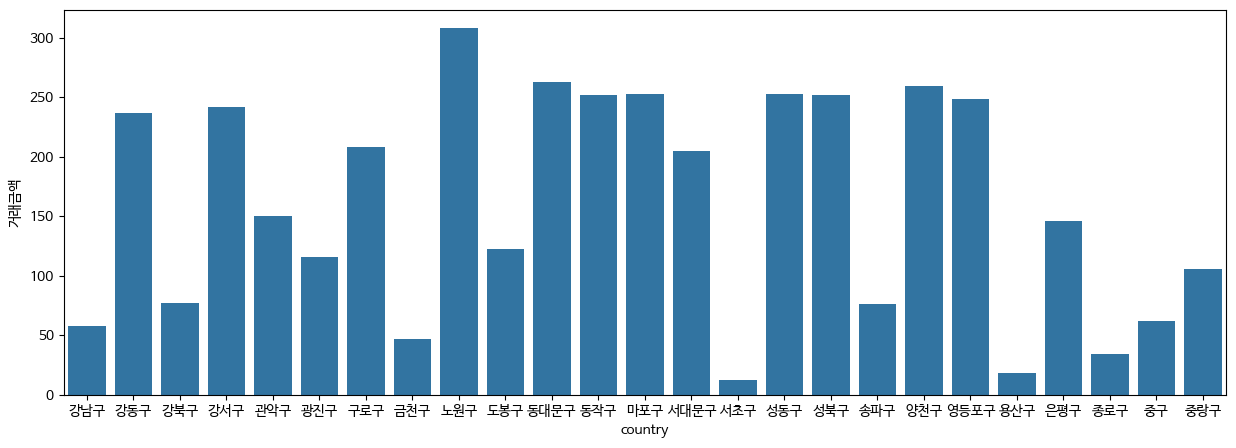

In [297]:
plt.figure(figsize=(15,5))
sns.barplot(data=gu_count)
plt.show()

In [298]:
# 구별 아파트 가격의 평균
gu_mean = seoul.groupby(by=['country'])['거래금액'].mean()

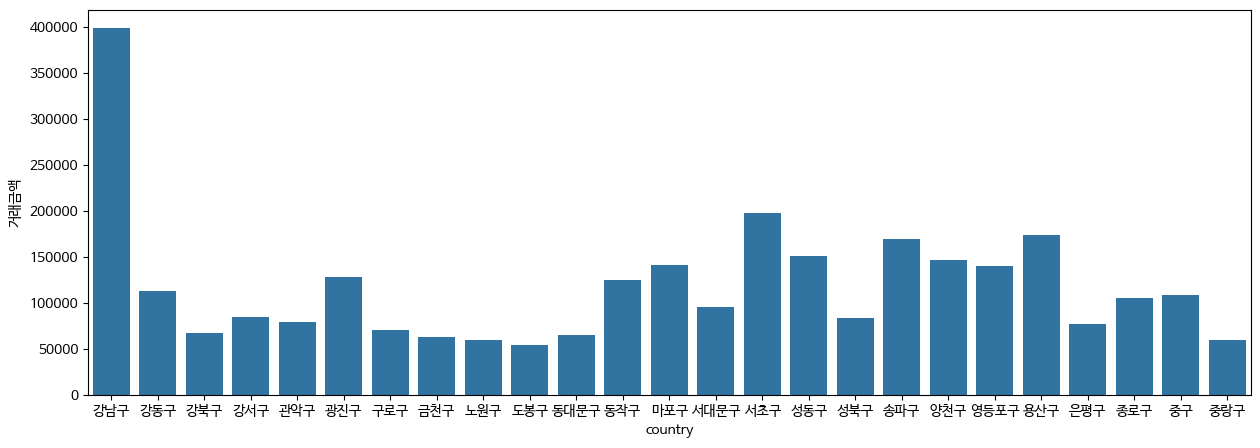

In [299]:
plt.figure(figsize=(15,5))
sns.barplot(gu_mean)
plt.show()

In [300]:
# 구별 아파트 가격의 최솟값
gu_min = seoul.groupby(by=['country'])['거래금액'].min()

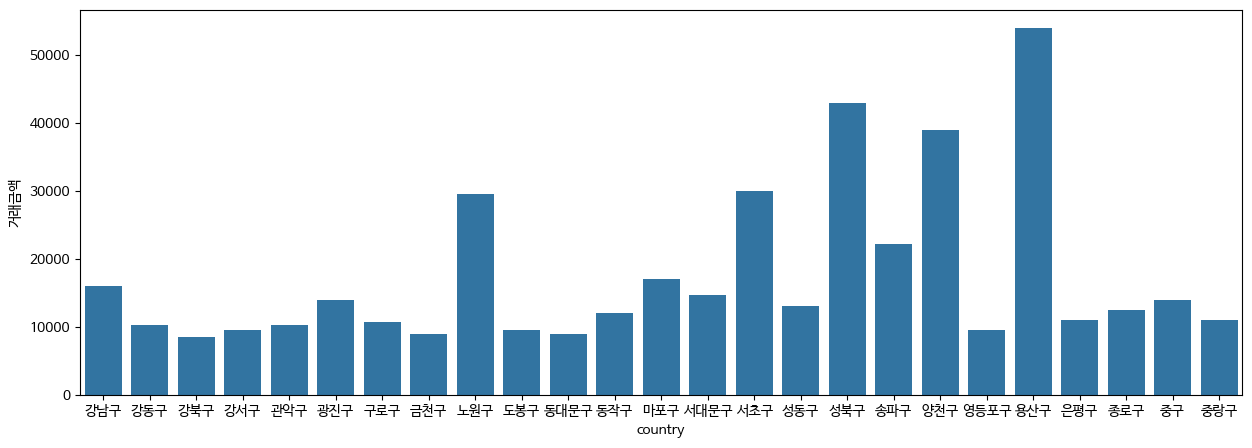

In [301]:
plt.figure(figsize=(15,5))
sns.barplot(data=gu_min)
plt.show()

In [302]:
# 구별 아파트 가격의 최댓값
gu_max = seoul.groupby(by=['country'])['거래금액'].max()

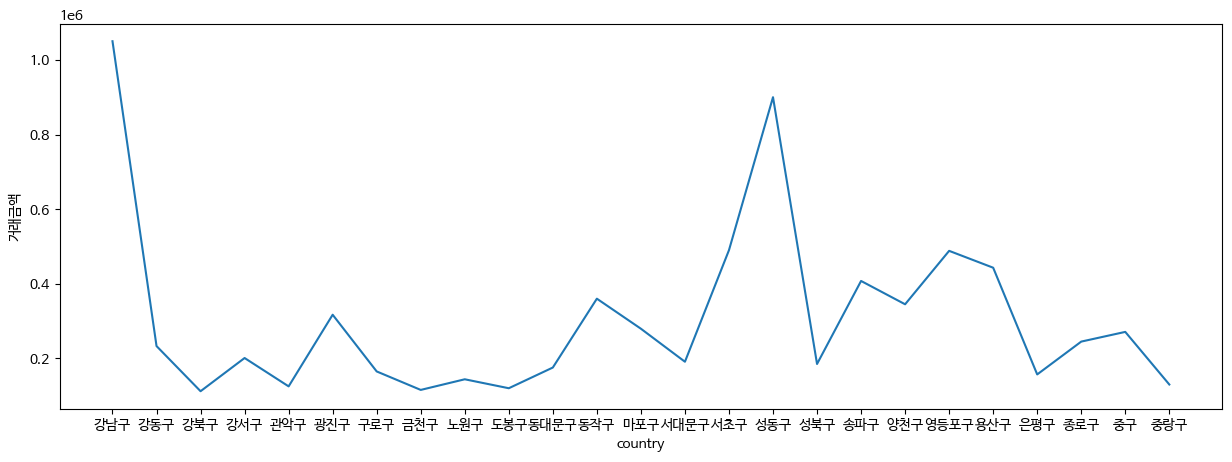

In [303]:
plt.figure(figsize=(15,5))
sns.lineplot(data=gu_max)
plt.show()

## 광역시도별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [304]:
# 광역시도별 아파트 가격 개수
pro_count = apt.groupby(by=['province'])['거래금액'].count()

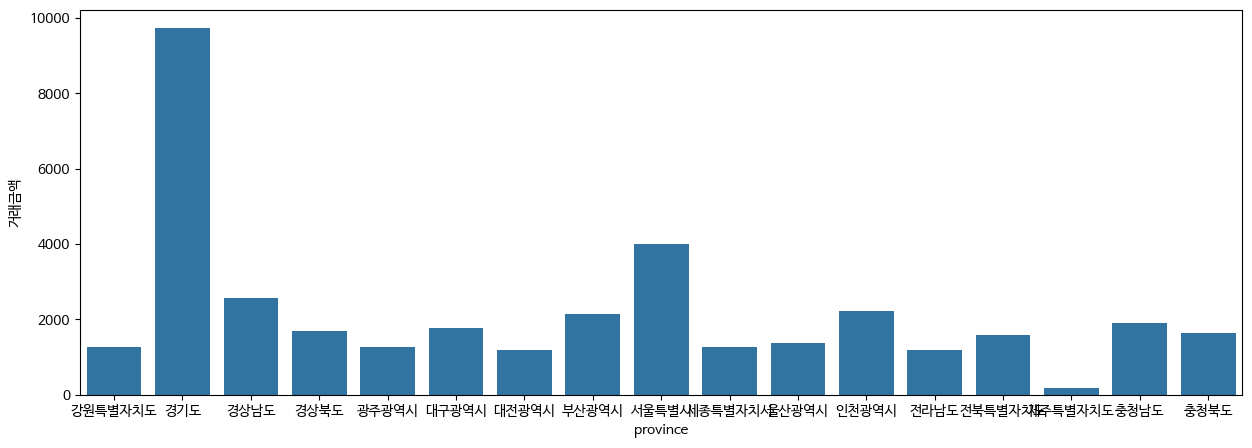

In [305]:
plt.figure(figsize=(15,5))
sns.barplot(pro_count)
plt.show()

In [306]:
# 광역시도별 아파트 가격 평균
pro_mean = apt.groupby(by=['province'])['거래금액'].mean()

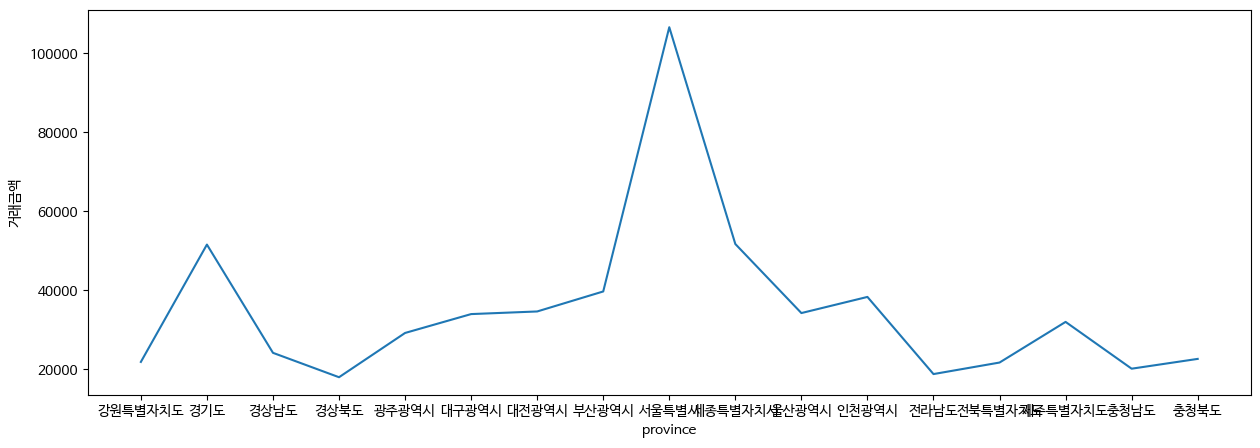

In [307]:
plt.figure(figsize=(15,5))
sns.lineplot(pro_mean)
plt.show()

In [308]:
# 광역시도별 아파트 가격 최솟값
pro_min = apt.groupby(by=['province'])['거래금액'].min()

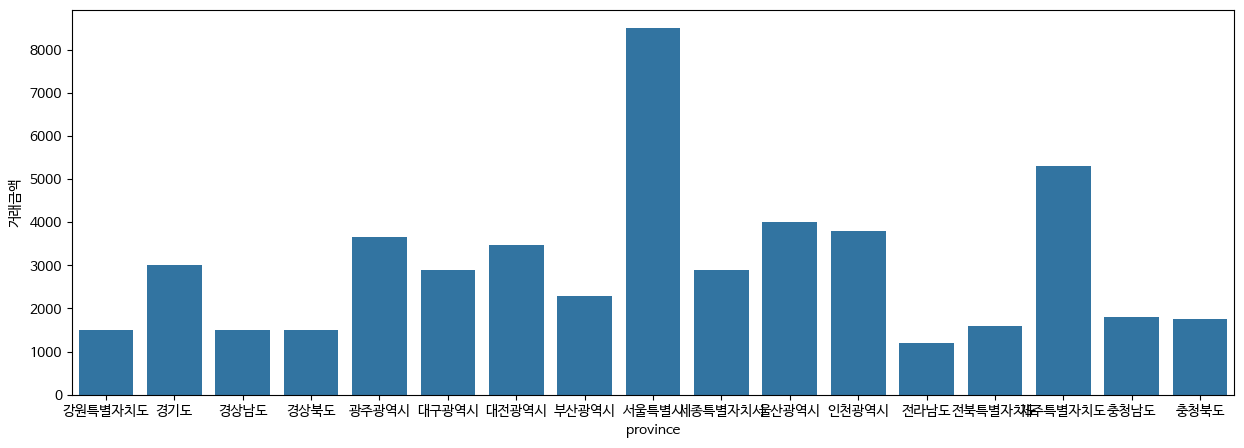

In [309]:
plt.figure(figsize=(15,5))
sns.barplot(pro_min)
plt.show()

In [310]:
# 광역시도별 아파트 가격 최댓값
pro_max = apt.groupby(by=['province'])['거래금액'].max()

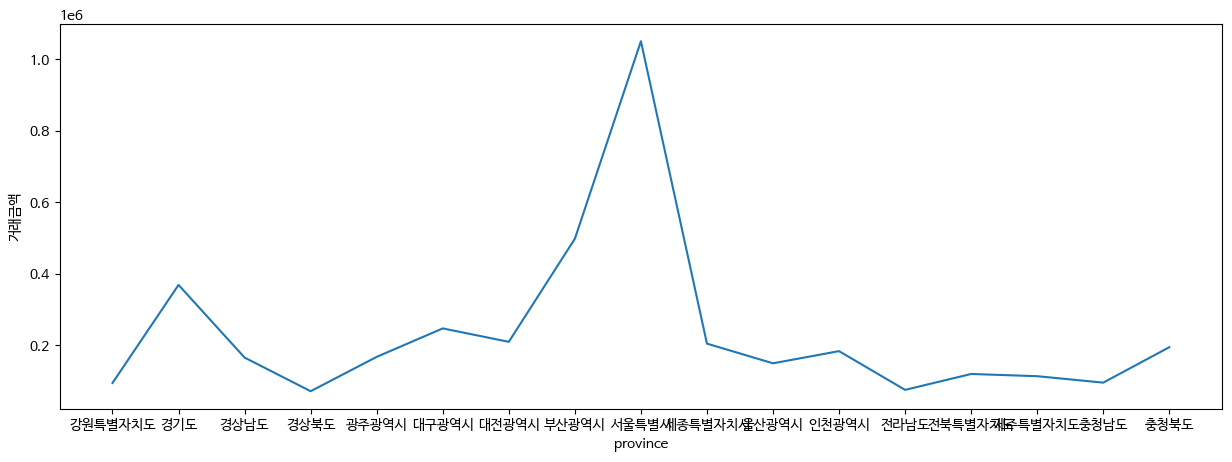

In [311]:
plt.figure(figsize=(15,5))
sns.lineplot(pro_max)
plt.show()

## 면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 구별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [313]:
# 면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 구하기
goal_df = apt[(apt['province'] == '서울특별시') & (apt['전용면적'] >= 84) & (apt['전용면적'] < 100)]

In [315]:
# 구별 아파트 가격 개수
goal_count = goal_df.groupby(by=['country'])['거래금액'].count()

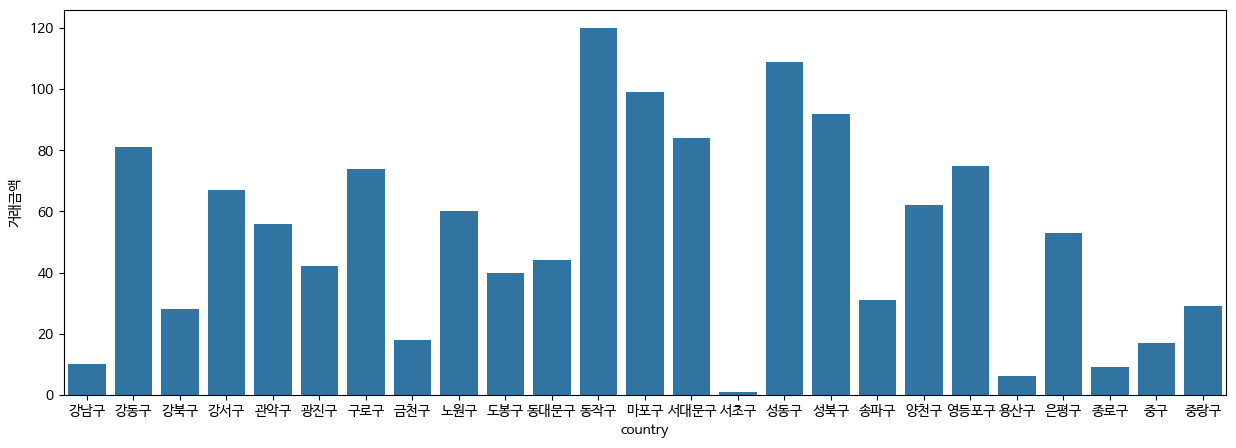

In [316]:
plt.figure(figsize=(15,5))
sns.barplot(goal_count)
plt.show()

In [317]:
# 구별 아파트 가격 평균
goal_mean = goal_df.groupby(by=['country'])['거래금액'].mean()

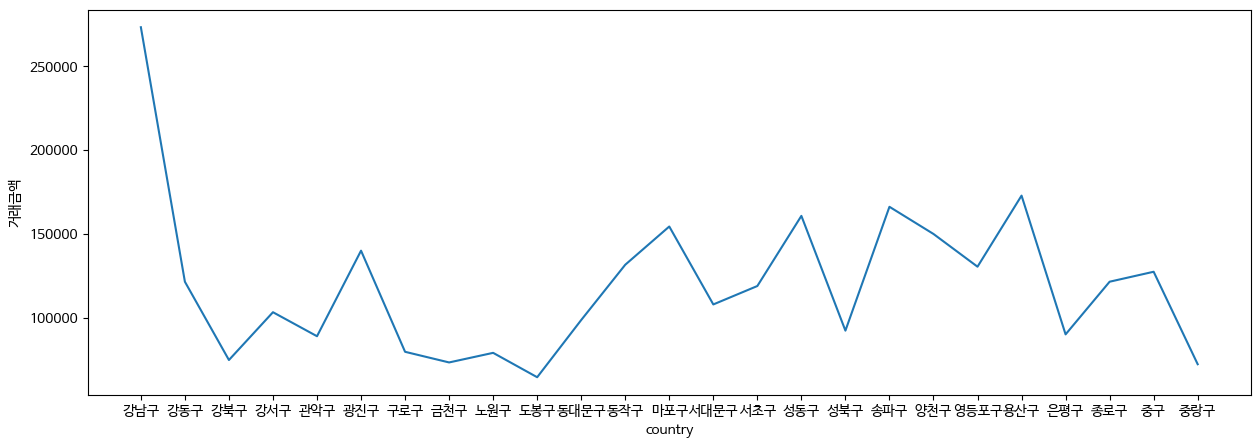

In [318]:
plt.figure(figsize=(15,5))
sns.lineplot(goal_mean)
plt.show()

In [319]:
# 구별 아파트 가격 최솟값
goal_min = goal_df.groupby(by=['country'])['거래금액'].min()

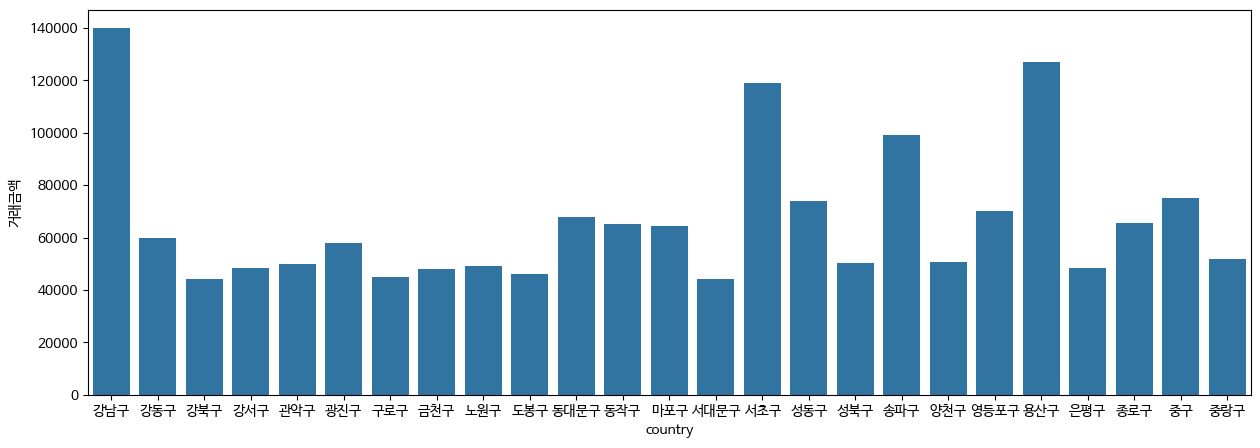

In [320]:
plt.figure(figsize=(15,5))
sns.barplot(goal_min)
plt.show()

In [321]:
# 구별 아파트 가격 최댓값
goal_max = goal_df.groupby(by=['country'])['거래금액'].max()

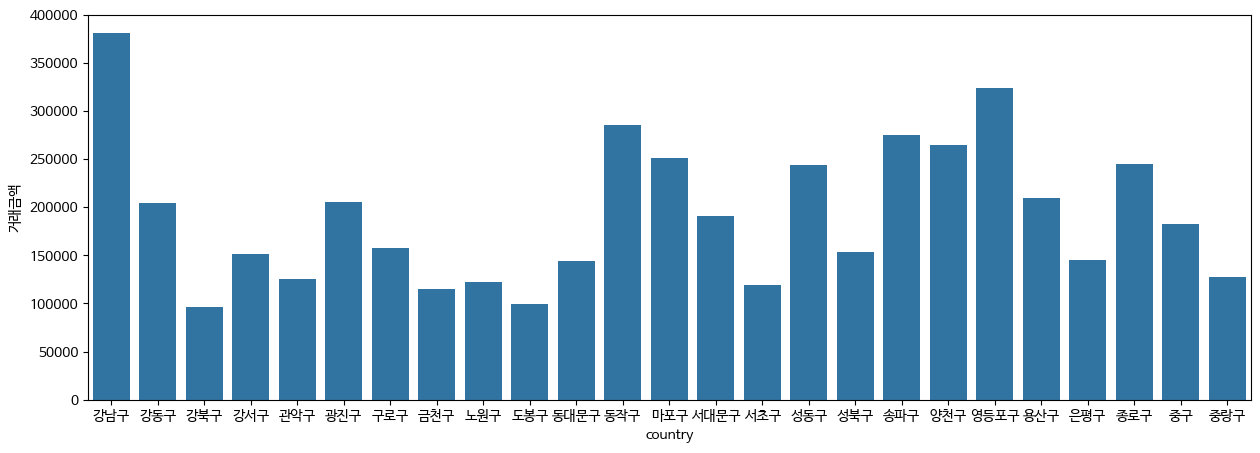

In [322]:
plt.figure(figsize=(15,5))
sns.barplot(goal_max)
plt.show()

## 면적이  $84 m^2$  이상  $100 m^2$  미만의 아파트들 중에서, 광역시도별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [324]:
# 면적이  $84 m^2$  이상  $100 m^2$  미만의 아파트들 구하기
apt_space = apt[(apt['전용면적'] >= 84) & (apt['전용면적'] < 100)]

In [325]:
# 광역시도별 아파트 가격 개수
space_count = apt_space.groupby(by='province')['거래금액'].count()

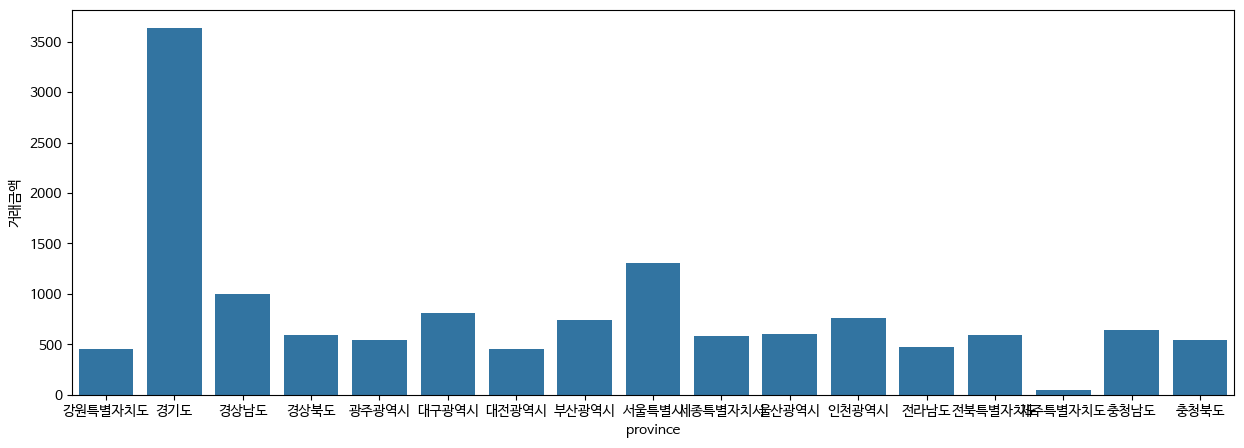

In [326]:
plt.figure(figsize=(15,5))
sns.barplot(space_count)
plt.show()

In [327]:
# 광역시도별 아파트 가격 평균
space_mean = apt_space.groupby(by='province')['거래금액'].mean()

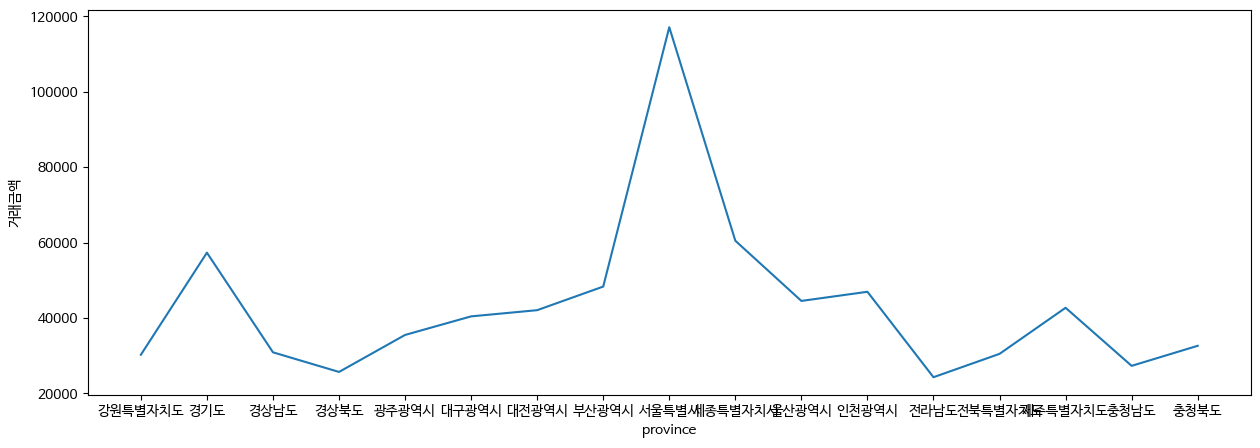

In [328]:
plt.figure(figsize=(15,5))
sns.lineplot(space_mean)
plt.show()

In [329]:
# 광역시도별 아파트 가격 최솟값
space_min = apt_space.groupby(by='province')['거래금액'].min()

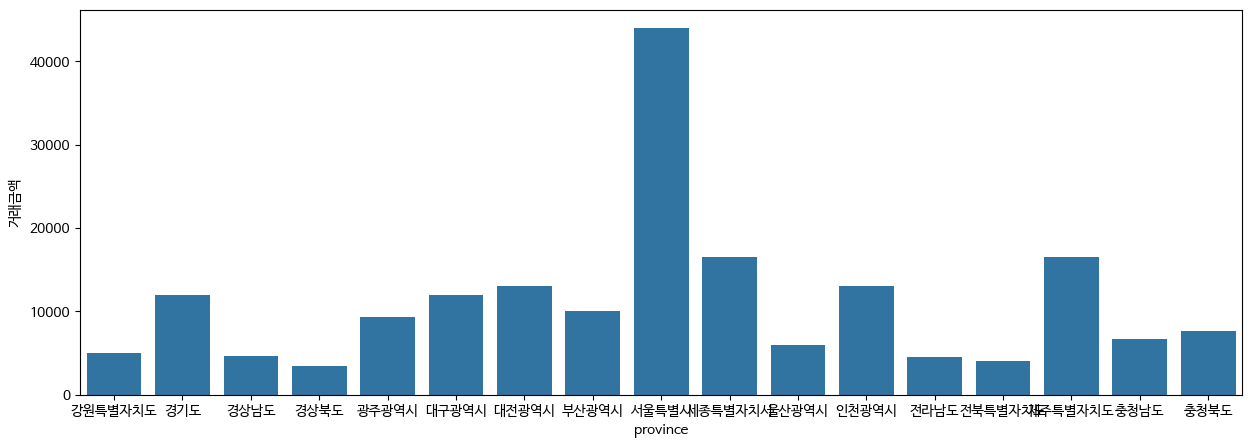

In [330]:
plt.figure(figsize=(15,5))
sns.barplot(space_min)
plt.show()

In [331]:
# 광역시도별 아파트 가격 최댓값
space_max = apt_space.groupby(by='province')['거래금액'].max()

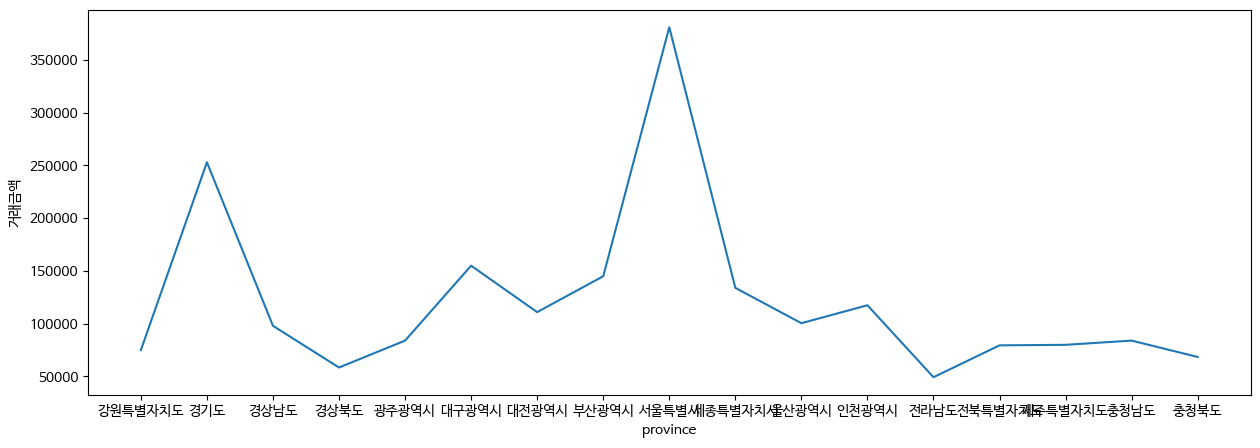

In [332]:
plt.figure(figsize=(15,5))
sns.lineplot(space_max)
plt.show()

### 결과를 평균의 내림차순으로 정렬해서 출력

In [333]:
# mean_ascend_f = apt_space.sort_values('거래금액(만원)', ascending=False)
# mean_ascend_f.head()
apt_space['거래금액'].mean()

np.float64(50266.97235925711)

### 결과를 최댓값의 내림차순으로 정렬해서 출력

In [334]:
mean_ascend_f = apt_space.sort_values('거래금액', ascending=False)
mean_ascend_f.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,country,year,month
24620,24621,서울특별시 강남구 압구정동,490,490,0,한양1차(영동한양),91.210,202504,10,381000,...,1977,압구정로 321,NaT,직거래,NaN,NaT,서울특별시,강남구,2025,04
12931,12932,서울특별시 강남구 개포동,1281,1281,0,디에이치아너힐즈,84.357,202504,18,350000,...,2019,삼성로 11,NaT,중개거래,서울 강남구,NaT,서울특별시,강남구,2025,04
32977,32978,서울특별시 영등포구 여의도동,525,525,0,브라이튼여의도,84.132,202504,3,324000,...,2023,국제금융로 39,NaT,중개거래,서울 영등포구,NaT,서울특별시,영등포구,2025,04
36551,36552,서울특별시 강남구 대치동,65,65,0,쌍용대치2,84.490,202504,1,312000,...,1983,영동대로 220,NaT,중개거래,서울 강남구,NaT,서울특별시,강남구,2025,04
9233,9234,서울특별시 강남구 삼성동,16-2,16,2,삼성동힐스테이트 1단지,84.236,202504,21,310000,...,2008,학동로68길 29,NaT,중개거래,서울 강남구,NaT,서울특별시,강남구,2025,04


### 결과를 최솟값의 오름차순으로 정렬해서 출력

# 서울특별시 아파트 가격의 최솟값, 최댓값, 평균이 매우 높게 상승되어 있음
# 전반적으로 서울 모든 지역의 아파트 가격이 높은 것인지 특정 지역에만 몰려 있는지 확인

In [336]:
seoul_mean = seoul.groupby('country')['거래금액'].mean()

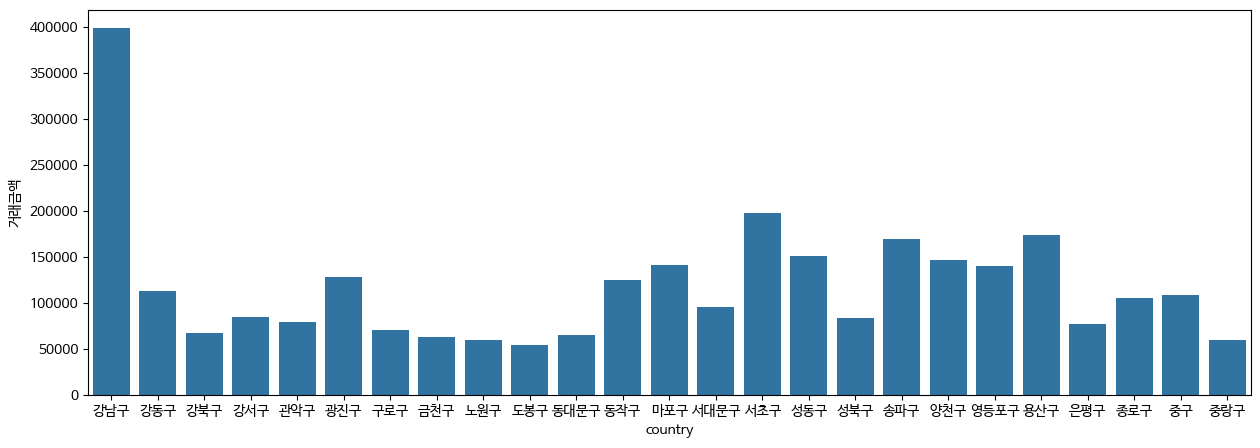

In [338]:
plt.figure(figsize=(15,5))
sns.barplot(seoul_mean)
plt.show()

강남구에만 아파트 가격의 평균이 매우 높으며 그다음으로는 서초구, 요안구, 송파구 순서지만 비슷한 수준으로 보여짐 (200,000)만원

그렇다면 다른 지역의 평균이나 최댓값도 이와 비슷한 지 확인

In [342]:
not_seoul = apt[~(apt.province == '서울특별시')]
not_seoul_mean = not_seoul.groupby('country')['거래금액'].mean()

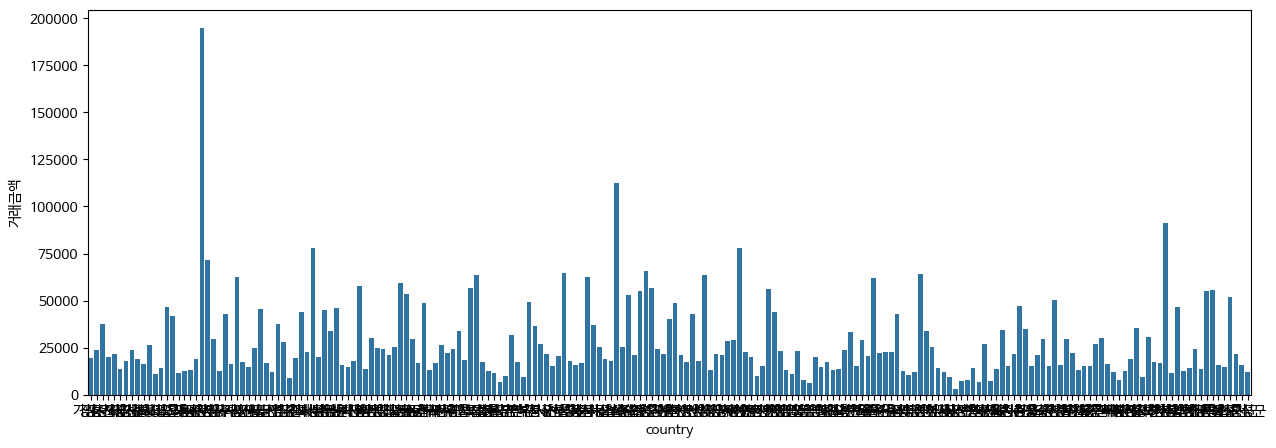

In [343]:
plt.figure(figsize=(15,5))
sns.barplot(not_seoul_mean)
plt.show()